In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Import dataset

In [2]:
train, test = tf.keras.datasets.mnist.load_data()
X_train = train[0].reshape(-1, 784)
y_train = keras.utils.to_categorical(train[1].reshape(-1), 10)
X_test = test[0].reshape(-1, 784)
y_test = keras.utils.to_categorical(test[1].reshape(-1), 10)

## Linear neural net

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.softmax, input_shape=(784,))
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 10.7172 - accuracy: 0.8275 - val_loss: 5.2947 - val_accuracy: 0.8853
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 5.1561 - accuracy: 0.8795 - val_loss: 5.0503 - val_accuracy: 0.8810
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 4.4433 - accuracy: 0.8846 - val_loss: 4.2501 - val_accuracy: 0.8903
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 4.2059 - accuracy: 0.8866 - val_loss: 4.5773 - val_accuracy: 0.8867
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 3.8909 - accuracy: 0.8891 - val_loss: 3.9728 - val_accuracy: 0.8954
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 3.9122 - accuracy: 0.8880 - val_loss: 4.3561 - val_accuracy: 0.8890
Epoch 7/20
60000/60000 [==============================] - 1s 19us/s

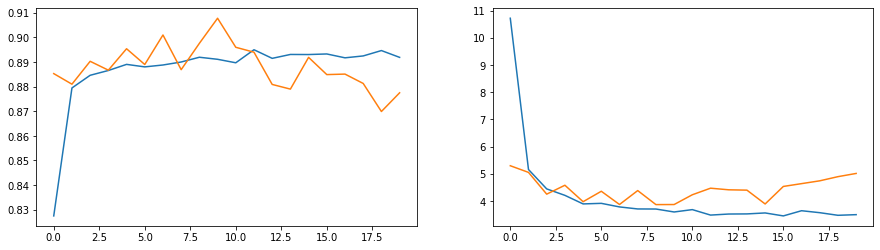

In [44]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(hist.history['accuracy'], label='Train Accuracy')
ax[0].plot(hist.history['val_accuracy'], label='Validation Accuracz')
ax[1].plot(hist.history['loss'], label='Train Loss')
ax[1].plot(hist.history['val_loss'], label='Validation Loss'); None

## GP Classification

In [77]:
n_train = 500
n_test = 1000
X_train_sub = X_train[0:n_train]
y_train_sub = np.argmax(y_train[0:n_train],axis=1)
X_test_sub = X_train[10000:10000+n_test]
y_test_sub = np.argmax(y_train[10000:10000+n_test],axis=1)

In [78]:
%%time
kernel = RBF()
gpc = GaussianProcessClassifier(kernel, random_state=23, n_restarts_optimizer=5)
clf = Pipeline([
        ('scale', StandardScaler()),
        ('clf', gpc)])
clf.fit(X_train_sub, y_train_sub)

CPU times: user 5min 16s, sys: 1min 30s, total: 6min 46s
Wall time: 3min 24s


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 GaussianProcessClassifier(copy_X_train=True,
                                           kernel=RBF(length_scale=1),
                                           max_iter_predict=100,
                                           multi_class='one_vs_rest',
                                           n_jobs=None, n_restarts_optimizer=5,
                                           optimizer='fmin_l_bfgs_b',
                                           random_state=23,
                                           warm_start=False))],
         verbose=False)

In [79]:
print('Accuracy: %.3f, logevidence: %.2f, kernel hyperparameters:%s' % (np.equal(y_test_sub, clf.predict(X_test_sub)).mean(), gpc.log_marginal_likelihood_value_, gpc.kernel_))

Accuracy: 0.76200000, logevidence: -133.81, kernel hyperparameters:CompoundKernel(3.4, 3.28, 3.29, 3.35, 3.41, 3.6, 3.38, 3.35, 3.61, 3.42)
